# Libraries 

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# Data Collection

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [3]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


# Data Pre-processing

## Merging Datasets
<br/>
Movies = 20 cols<br/>
Credits = 4 cols<br/>
Join on='Title'<br/>

In [4]:
movies = movies.merge(credits, on='title')

In [11]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.shape

(4809, 23)

In [10]:
movies.describe()

,movie_id
count,4809.000000
mean,57120.571429
std,88653.369849
min,5.000000
25%,9012.000000
50%,14624.000000
75%,58595.000000
max,459488.000000


## Filtering Data
**Columns required**

1. genres <br>
2. id <br>
3. keywords (tags) <br>
4. title <br>
5. overview <br>
6. cast <br>
7. crew <br>


In [7]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [8]:
print(movies.info())
movies.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB
None


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## Data Cleaning

### Remove Null

In [9]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [10]:
movies.dropna(inplace=True)

In [11]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

### Remove Duplicate Data

In [12]:
movies.duplicated().sum()

0

### Pre-processing Columns

#### Genres Column

Data provided as String

In [12]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

**Funtion to:**
1. Convert String -> List using ast library
2. Extract 'name' from dictionary
3. Append to a new List

In [13]:
import ast
def extract_list(str):
    L = []
    for i in ast.literal_eval(str):
        L.append(i['name'])
    return L
movies['genres'] = movies['genres'].apply(extract_list)

In [14]:
movies['genres'] = movies['genres'].apply(extract_list)

In [15]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24572\1829050987.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


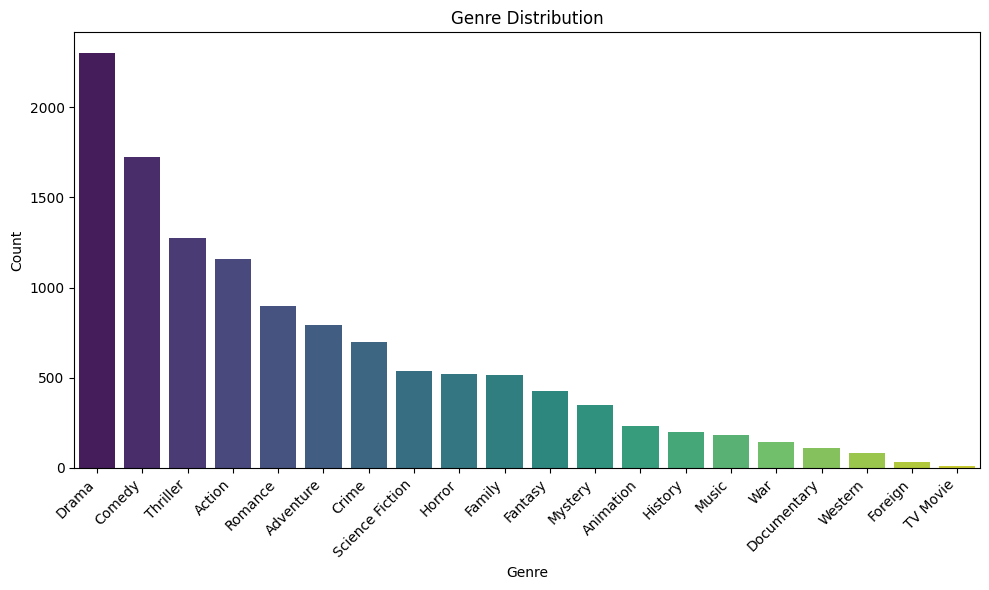

In [24]:
all_genres = [genre for genres_list in movies['genres'] for genre in genres_list]

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
genre_counts

Drama              2300
Comedy             1723
Thriller           1275
Action             1156
Romance             895
Adventure           792
Crime               697
Science Fiction     538
Horror              520
Family              514
Fantasy             425
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64

#### Keywords Column

In [26]:
movies.keywords

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4807                                                   []
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4809, dtype: object

In [27]:
movies['keywords'] = movies['keywords'].apply(extract_list)

In [19]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [28]:
all_keywords = [keyword for keywords_list in movies['keywords'] for keyword in keywords_list]

# Count occurrences of each keyword
keyword_counts = pd.Series(all_keywords).value_counts()
keyword_counts

woman director          324
independent film        320
duringcreditsstinger    308
based on novel          198
murder                  189
                       ... 
out of control            1
missing woman             1
materialism               1
ringer                    1
postal worker             1
Name: count, Length: 9813, dtype: int64

#### Cast Column
**Extract Top 3 'name' value (Actor name)**

In [30]:
movies['cast'][1]

'[{"cast_id": 4, "character": "Captain Jack Sparrow", "credit_id": "52fe4232c3a36847f800b50d", "gender": 2, "id": 85, "name": "Johnny Depp", "order": 0}, {"cast_id": 5, "character": "Will Turner", "credit_id": "52fe4232c3a36847f800b511", "gender": 2, "id": 114, "name": "Orlando Bloom", "order": 1}, {"cast_id": 6, "character": "Elizabeth Swann", "credit_id": "52fe4232c3a36847f800b515", "gender": 1, "id": 116, "name": "Keira Knightley", "order": 2}, {"cast_id": 12, "character": "William \\"Bootstrap Bill\\" Turner", "credit_id": "52fe4232c3a36847f800b52d", "gender": 2, "id": 1640, "name": "Stellan Skarsg\\u00e5rd", "order": 3}, {"cast_id": 10, "character": "Captain Sao Feng", "credit_id": "52fe4232c3a36847f800b525", "gender": 2, "id": 1619, "name": "Chow Yun-fat", "order": 4}, {"cast_id": 9, "character": "Captain Davy Jones", "credit_id": "52fe4232c3a36847f800b521", "gender": 2, "id": 2440, "name": "Bill Nighy", "order": 5}, {"cast_id": 7, "character": "Captain Hector Barbossa", "credit_

In [31]:
import ast
def extract_top3(str):
    L = []
    counter = 0
    for i in ast.literal_eval(str):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [32]:
movies['cast'] = movies['cast'].apply(extract_top3)

In [33]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [36]:
all = [i for cast_list in movies['cast'] for i in cast_list]
counts = pd.Series(all).value_counts()
counts

Robert De Niro        46
Matt Damon            35
Samuel L. Jackson     35
Bruce Willis          35
Nicolas Cage          34
                      ..
Warren Oates           1
Mykelti Williamson     1
Eddie Albert           1
Paul Anka              1
Brian Herzlinger       1
Name: count, Length: 5687, dtype: int64

#### Crew Column
**Extract 'job'=Director from the dictionary**

In [34]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [38]:
import ast
def extract_director(str):
    L = []
    for i in ast.literal_eval(str):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [39]:
movies['crew'] = movies['crew'].apply(extract_director)

In [40]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [41]:
all = [i for cast_list in movies['crew'] for i in cast_list]
counts = pd.Series(all).value_counts()
counts

Steven Spielberg    27
Woody Allen         21
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        16
                    ..
Paolo Sorrentino     1
Jon Poll             1
Antonia Bird         1
Fred Schepisi        1
Brian Herzlinger     1
Name: count, Length: 2349, dtype: int64

#### Overview

In [42]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [44]:
movies.dropna(subset=['overview'], inplace=True)

In [46]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [47]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


## Tags Creation

### Space Removal
**Remove space between words to identity them as a single entity to create tag.**<br/>


In [48]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [49]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


### Tags Column

In [50]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [51]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."


## Reforming Dataframe
**Columns**

1. movie_id <br>
2. title <br>
3. Tags (genre + overview + cast[Top 3], + crew[Director]) <br>

In [52]:
new_movies = movies[['movie_id','title','tags']]


In [36]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24572\2707604027.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['title'], y=top_movies['num_words'], palette='viridis')


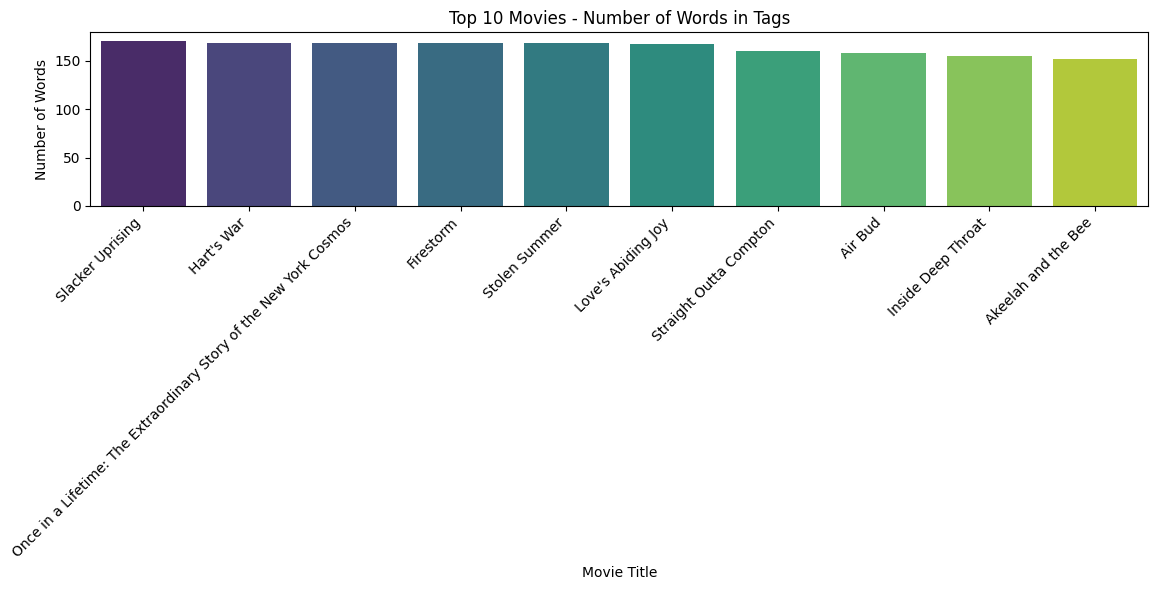

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24572\2707604027.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sampled_movies['word_category'], palette='viridis')


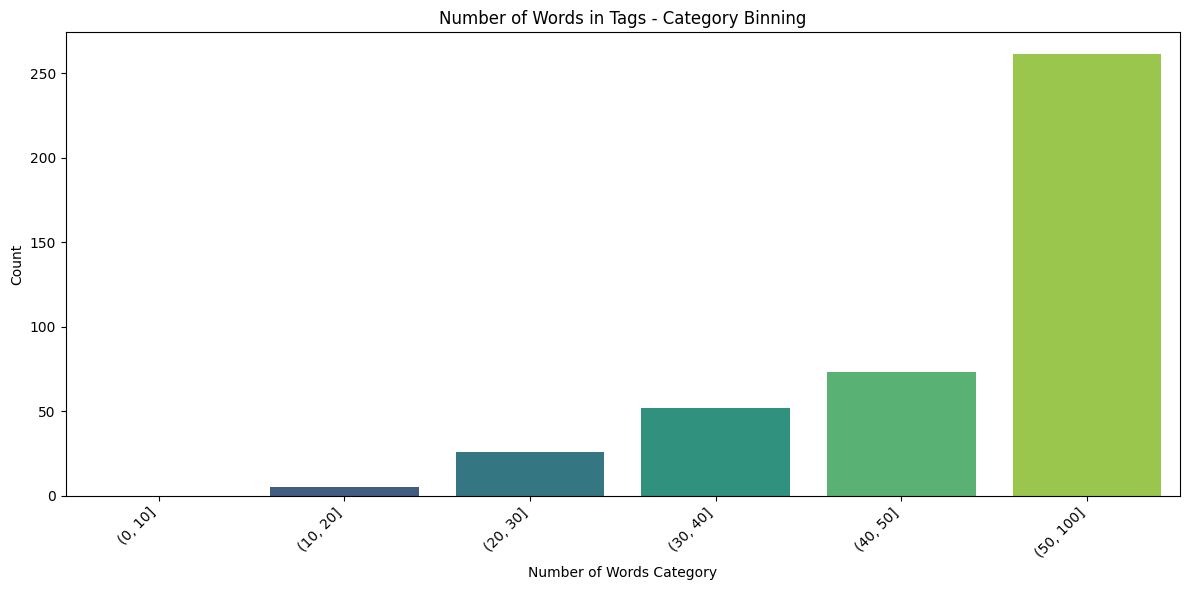

In [58]:
sampled_movies = movies.sample(frac=0.1, random_state=42)

# Count the number of words in each 'tags' entry
sampled_movies['num_words'] = sampled_movies['tags'].apply(len)

# Top N Movies
top_n = 10  # Set the number of top movies to display
top_movies = sampled_movies.nlargest(top_n, 'num_words')

# Category Binning
bins = [0, 10, 20, 30, 40, 50, 100]  # Define bins based on the number of words
sampled_movies['word_category'] = pd.cut(sampled_movies['num_words'], bins=bins)

# Plotting Top N Movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['title'], y=top_movies['num_words'], palette='viridis')
plt.title(f'Top {top_n} Movies - Number of Words in Tags')
plt.xlabel('Movie Title')
plt.ylabel('Number of Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Category Binning
plt.figure(figsize=(12, 6))
sns.countplot(x=sampled_movies['word_category'], palette='viridis')
plt.title('Number of Words in Tags - Category Binning')
plt.xlabel('Number of Words Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Tags List -> String

In [69]:
new_movies['tags'] = movies['tags'].apply(lambda x:" ".join(x))

In [70]:
new_movies['tags']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

**Lowercase**

In [71]:
new_movies['tags'] = new_movies['tags'].apply(lambda x:x.lower())

In [72]:
new_movies.head(3)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...


In [73]:
new_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   tags      4806 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.2+ KB


### Stemming words with NLTK
**Stemming** is the process of producing morphological variants of a root/base word.<br>


#### Library (NLTK)
#### Function stem(string)
**Output:** String of stemmed words

#### Porter Stemmer

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [74]:
def stemPS(text):
    L = []
    for i in text.split():
        L.append(ps.stem(i))
    string = " ".join(L)
    return string

#### Snowball Stemmer

In [63]:
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer(language='english')

In [75]:
def stem(text):
    L = []
    for i in text.split():
        L.append(sb.stem(i))
    string = " ".join(L)
    return string

 Stemming is a text normalization technique that reduces words to their root or base form.

In [76]:
new_movies['tags'].apply(stemPS)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [65]:
new_movies['tags'].apply(stem)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, has ...
2       a cryptic messag from bond past send him on a ...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play his guitar and c...
4805    a newlyw coupl honeymoon is upend by the arriv...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [77]:
new_movies['tags'] = new_movies['tags'].apply(stem)

In [78]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, has ..."
2,206647,Spectre,a cryptic messag from bond past send him on a ...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


# Model Building

## Text Vectorization

### Library (sklearn, Count Verctorizer)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words='english')

### Vectorization
**Output:** ndarray

In [80]:
vectors = cv.fit_transform(new_movies['tags']).toarray()

In [81]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
cv.get_feature_names_out()

['000' '007' '10' ... 'zooeydeschanel' 'zookeep' 'zoëkravitz']


array(['000', '007', '10', ..., 'zooeydeschanel', 'zookeep', 'zoëkravitz'],
      dtype=object)

## Similarity Measure

**Cosine similarity** is the cosine of the angle between the vectors.<br>
Distance inversely proportional to similarity.<br>
Values: 0 to 1 (1 : most similar, 0 : not so similar)

### Library (Cosine_similarity)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

Distance of a movie from all other movies.

In [85]:
similarity = cosine_similarity(vectors)

In [86]:
# Sparse matrix
similarity.shape

(4806, 4806)

In [87]:
similarity[0]

array([1.        , 0.0729325 , 0.07396705, ..., 0.04007219, 0.        ,
       0.        ])

In [88]:
similarity[1]

array([0.0729325 , 1.        , 0.05634362, ..., 0.02289343, 0.        ,
       0.        ])

In [89]:
similarity

array([[1.        , 0.0729325 , 0.07396705, ..., 0.04007219, 0.        ,
        0.        ],
       [0.0729325 , 1.        , 0.05634362, ..., 0.02289343, 0.        ,
        0.        ],
       [0.07396705, 0.05634362, 1.        , ..., 0.02321817, 0.        ,
        0.        ],
       ...,
       [0.04007219, 0.02289343, 0.02321817, ..., 1.        , 0.03965258,
        0.04189458],
       [0.        , 0.        , 0.        , ..., 0.03965258, 1.        ,
        0.04402255],
       [0.        , 0.        , 0.        , ..., 0.04189458, 0.04402255,
        1.        ]])

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [101]:
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, has ..."
2,206647,Spectre,a cryptic messag from bond past send him on a ...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [106]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(clf, tfidf_matrix, df['title'], cv=3)  # Adjust the number of folds
# mean_cv_accuracy = cv_scores.mean()
# print(f'Mean Cross-Validation Accuracy: {mean_cv_accuracy}')


# Recommend Function

In [91]:
def recommend(movie):
    movie_index = new_movies[new_movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:4]
    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

In [92]:
recommend('Superman')

Superman II
Superman Returns
Superman IV: The Quest for Peace


In [93]:
recommend('Harry Potter and the Half-Blood Prince')

Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Prisoner of Azkaban


# Model dump

In [63]:
# import pickle

In [64]:
# pickle.dump(new_movies, open('data/pkl_data/movies_df.pkl','wb'))

In [65]:
# pickle.dump(similarity, open('data/pkl_data/similarity.pkl','wb'))